In [ ]:
pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.2/69.2 KB 4.0 MB/s eta 0:00:00


In [ ]:
from datetime import date
import snscrape.modules.twitter as sntwitter
import pandas as pd
import numpy as np
from textblob import TextBlob
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
import spacy
nlp = spacy.load("en_core_web_sm")

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
tweets_list=[]
maxTweets=1000
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('Crypto since:2021-01-01 until:{today}').get_items()):
  if i>maxTweets:
    break
  tweets_list.append([tweet.content])
tweets_list




<ipython-input-4-a6d349b2c602>:6: FutureWarning: content is deprecated, use rawContent instead
  tweets_list.append([tweet.content])


[['Our 50% discount for sponsors is until today only. Go dm me!🥰'],
 ['@CryptoTea_ While the biggest goldmine ever was just found in 2020, seems risky to me #gold \n\nAnd it’s 100% bat shit crazy how some of them mine until today!'],
 ['@FakeNews_Actual @annon1454 Ive never called the cops until today, better hunker down bud'],
 ['I’ve  never seen the second part until today… wow'],
 ["@RocDocs13 @GrantCardone @Project_Veritas @TwitterSpaces @JamesOKeefeIII Because up until today, they were doing honest reporting, thanks entirely to James O'Keefe."],
 ['@XRPjenna Never heard that term until today but eww not a fan.'],
 ['@muncheds3 @Cheguevoblin That was Che. Until today… https://t.co/jUhtfDwGRa'],
 ['@_ItsArnout_ @XMaximist @enterprimal @bitcoinnews777 Paid shills aside I really do like Mando! eye opening video though! No idea what Primal was until today but seeing they’ve copied @Oly245 project to a T makes me even more bullish on $XCAD @XcademyOfficial 🔥🔥'],
 ['If people in #crypto 

In [ ]:
tweet_to_df=pd.DataFrame(tweets_list,columns=['Tweets'])
tweet_to_df

,Tweets
0,Our 50% discount for sponsors is until today o...
1,@CryptoTea_ While the biggest goldmine ever wa...
2,@FakeNews_Actual @annon1454 Ive never called t...
3,I’ve never seen the second part until today… wow
4,@RocDocs13 @GrantCardone @Project_Veritas @Twi...
...,...
996,@RobertEstrada8 @Croesus_BTC @tedcruz @marcoru...
997,I had not burned incense since 2003 until toda...
998,@CryptoBeatniks @crypto_banter @cryptomanran @...
999,@CharlesPatte until today only. I'm late to kn...


In [ ]:
tweet_to_df.head(10)

,Tweets
0,Our 50% discount for sponsors is until today o...
1,@CryptoTea_ While the biggest goldmine ever wa...
2,@FakeNews_Actual @annon1454 Ive never called t...
3,I’ve never seen the second part until today… wow
4,@RocDocs13 @GrantCardone @Project_Veritas @Twi...
5,@XRPjenna Never heard that term until today bu...
6,@muncheds3 @Cheguevoblin That was Che. Until t...
7,@_ItsArnout_ @XMaximist @enterprimal @bitcoinn...
8,If people in #crypto actually knew how to prop...
9,@OKCoinJapan i'm tired hear about shibarium by...


In [ ]:
def cleanTweets(text):
    text = re.sub('@[A-Za-z0-9_]+', '', text) #removes @mentions
    text = re.sub('#','',text) #removes hastag '#' symbol
    text = re.sub('RT[\s]+','',text)
    text = re.sub('https?:\/\/\S+', '', text) 
    text = re.sub('\n',' ',text)
    return text

In [ ]:
tweet_to_df['cleanTweets']=tweet_to_df['Tweets'].apply(cleanTweets)
tweet_to_df.head()

,Tweets,cleanTweets
0,Our 50% discount for sponsors is until today o...,Our 50% discount for sponsors is until today o...
1,@CryptoTea_ While the biggest goldmine ever wa...,While the biggest goldmine ever was just foun...
2,@FakeNews_Actual @annon1454 Ive never called t...,"Ive never called the cops until today, bette..."
3,I’ve never seen the second part until today… wow,I’ve never seen the second part until today… wow
4,@RocDocs13 @GrantCardone @Project_Veritas @Twi...,"Because up until today, they were doing h..."


In [ ]:
tweet_to_df.to_csv('tweets_crypto.csv')

In [ ]:
savedTweets=pd.read_csv('tweets_crypto.csv',index_col=0)

In [ ]:
#subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity
#polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

In [ ]:
tweet_to_df['Subjectivity']=tweet_to_df['cleanTweets'].apply(getSubjectivity)
tweet_to_df['Polarity']=tweet_to_df['cleanTweets'].apply(getPolarity)
tweet_to_df.head()

,Tweets,cleanTweets,Subjectivity,Polarity
0,Our 50% discount for sponsors is until today o...,Our 50% discount for sponsors is until today o...,1.000000,0.000000
1,@CryptoTea_ While the biggest goldmine ever wa...,While the biggest goldmine ever was just foun...,0.850000,-0.475000
2,@FakeNews_Actual @annon1454 Ive never called t...,"Ive never called the cops until today, bette...",0.394444,0.172222
3,I’ve never seen the second part until today… wow,I’ve never seen the second part until today… wow,0.500000,0.050000
4,@RocDocs13 @GrantCardone @Project_Veritas @Twi...,"Because up until today, they were doing h...",0.575000,0.266667


In [ ]:
def getAnalysis(score):
  #score<0 -> negative
  if score<0:
    return 'Negative'
  #score>0 -> positive
  elif score>0:
    return 'Positive'
  #score==0 -> neutral
  else:
    return 'Neutral'

In [ ]:
getAnalysis(0)

'Neutral'

In [ ]:
tweet_to_df['Analysis'] = tweet_to_df['Polarity'].apply(getAnalysis)

In [ ]:
tweet_to_df.head()

,Tweets,cleanTweets,Subjectivity,Polarity,Analysis
0,Our 50% discount for sponsors is until today o...,Our 50% discount for sponsors is until today o...,1.000000,0.000000,Neutral
1,@CryptoTea_ While the biggest goldmine ever wa...,While the biggest goldmine ever was just foun...,0.850000,-0.475000,Negative
2,@FakeNews_Actual @annon1454 Ive never called t...,"Ive never called the cops until today, bette...",0.394444,0.172222,Positive
3,I’ve never seen the second part until today… wow,I’ve never seen the second part until today… wow,0.500000,0.050000,Positive
4,@RocDocs13 @GrantCardone @Project_Veritas @Twi...,"Because up until today, they were doing h...",0.575000,0.266667,Positive


In [ ]:
tweet_to_df['Analysis'].value_counts()

Positive    584
Negative    211
Neutral     206
Name: Analysis, dtype: int64

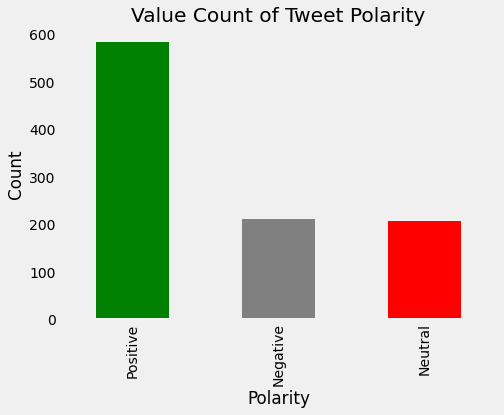

In [ ]:
fig=plt.figure(figsize=(7,5))
colors=['green','grey','red']
tweet_to_df['Analysis'].value_counts().plot(kind='bar',color=colors)
plt.title('Value Count of Tweet Polarity')
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.grid(False)
plt.show()

In [ ]:
sentences=[]
for word in tweet_to_df['cleanTweets']:
  sentences.append(word)
sentences

['Our 50% discount for sponsors is until today only. Go dm me!🥰',
 ' While the biggest goldmine ever was just found in 2020, seems risky to me gold   And it’s 100% bat shit crazy how some of them mine until today!',
 '  Ive never called the cops until today, better hunker down bud',
 'I’ve  never seen the second part until today… wow',
 "     Because up until today, they were doing honest reporting, thanks entirely to James O'Keefe.",
 ' Never heard that term until today but eww not a fan.',
 '  That was Che. Until today… ',
 '    Paid shills aside I really do like Mando! eye opening video though! No idea what Primal was until today but seeing they’ve copied  project to a T makes me even more bullish on $XCAD  🔥🔥',
 'If people in crypto actually knew how to properly view the real $HEX chart from its launch until today, HEX would already be viral... Educate yourself so you can make sound financial decisions using real information and data... ',
 " i'm tired hear about shibarium by 2 yea

In [ ]:
lines=list()
for line in sentences:
  words=line.split()
  for w in words:
    lines.append(w)

In [ ]:
lines

['While',
 'the',
 'biggest',
 'goldmine',
 'ever',
 'was',
 'just',
 'found',
 'in',
 '2020,',
 'seems',
 'risky',
 'to',
 'me',
 'gold',
 'And',
 'it’s',
 '100%',
 'bat',
 'shit',
 'crazy',
 'how',
 'some',
 'of',
 'them',
 'mine',
 'until',
 'today!',
 'Ive',
 'never',
 'called',
 'the',
 'cops',
 'until',
 'today,',
 'better',
 'hunker',
 'down',
 'bud',
 'I’ve',
 'never',
 'seen',
 'the',
 'second',
 'part',
 'until',
 'today…',
 'wow',
 'Never',
 'heard',
 'that',
 'term',
 'until',
 'today',
 'but',
 'eww',
 'not',
 'a',
 'fan.',
 'That',
 'was',
 'Che.',
 'Until',
 'today…',
 'Paid',
 'shills',
 'aside',
 'I',
 'really',
 'do',
 'like',
 'Mando!',
 'eye',
 'opening',
 'video',
 'though!',
 'No',
 'idea',
 'what',
 'Primal',
 'was',
 'until',
 'today',
 'but',
 'seeing',
 'they’ve',
 'copied',
 'project',
 'to',
 'a',
 'T',
 'makes',
 'me',
 'even',
 'more',
 'bullish',
 'on',
 '$XCAD',
 '🔥🔥',
 'If',
 'people',
 'in',
 'crypto',
 'actually',
 'knew',
 'how',
 'to',
 'properly',


In [ ]:
stemmer=SnowballStemmer(language='english')
stem1=[]
for word in lines:
  stem1.append(stemmer.stem(word))
stem1[:20]

['our',
 '50%',
 'discount',
 'for',
 'sponsor',
 'is',
 'until',
 'today',
 'only.',
 'go',
 'dm',
 'me!🥰',
 'while',
 'the',
 'biggest',
 'goldmin',
 'ever',
 'was',
 'just',
 'found']

In [ ]:
post_stem=[]
for word in stem1:
  if word not in nlp.Defaults.stop_words:
    post_stem.append(word)
post_stem

['50%',
 'discount',
 'sponsor',
 'today',
 'only.',
 'dm',
 'me!🥰',
 'biggest',
 'goldmin',
 'found',
 '2020,',
 'riski',
 'gold',
 '100%',
 'bat',
 'shit',
 'crazi',
 'today!',
 'ive',
 'cop',
 'today,',
 'better',
 'hunker',
 'bud',
 "i'v",
 'seen',
 'second',
 'today…',
 'wow',
 'becaus',
 'today,',
 'honest',
 'reporting,',
 'thank',
 'entir',
 'jame',
 "o'keefe.",
 'heard',
 'term',
 'today',
 'eww',
 'fan.',
 'che.',
 'today…',
 'paid',
 'shill',
 'asid',
 'realli',
 'like',
 'mando!',
 'eye',
 'open',
 'video',
 'though!',
 'idea',
 'primal',
 'today',
 "they'v",
 'copi',
 'project',
 't',
 'bullish',
 '$xcad',
 '🔥🔥',
 'peopl',
 'crypto',
 'actual',
 'knew',
 'proper',
 'view',
 'real',
 '$hex',
 'chart',
 'launch',
 'today,',
 'hex',
 'alreadi',
 'viral...',
 'educ',
 'sound',
 'financi',
 'decis',
 'use',
 'real',
 'inform',
 'data...',
 "i'm",
 'tire',
 'hear',
 'shibarium',
 '2',
 'year',
 'ago,',
 'today',
 'realeas',
 "i'm",
 'tire',
 'hear',
 'shibarium',
 '2',
 'year',


In [ ]:
pip install clean-text


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 KB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 KB 12.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=7e3f47bc572377ebdb7d9df2d3b7550b437990b5d9b192f3a045a241cb2936ce
  Stored in directory: /root/.cache/pip/wheels/5e/8c/80/c3646df8201ba6f5070297fe3779a4b70265d0bfd961c15302
Successfully built emoji


In [ ]:
post_stem2=[]
from cleantext import clean
for word in post_stem:
  x=clean(word,no_emoji=True)
  if len(x)>0:
    post_stem2.append(x)

In [ ]:
post_stem2

['50%',
 'discount',
 'sponsor',
 'today',
 'only.',
 'dm',
 'me!',
 'biggest',
 'goldmin',
 'found',
 '2020,',
 'riski',
 'gold',
 '100%',
 'bat',
 'shit',
 'crazi',
 'today!',
 'ive',
 'cop',
 'today,',
 'better',
 'hunker',
 'bud',
 "i'v",
 'seen',
 'second',
 'today',
 'wow',
 'becaus',
 'today,',
 'honest',
 'reporting,',
 'thank',
 'entir',
 'jame',
 "o'keefe.",
 'heard',
 'term',
 'today',
 'eww',
 'fan.',
 'che.',
 'today',
 'paid',
 'shill',
 'asid',
 'realli',
 'like',
 'mando!',
 'eye',
 'open',
 'video',
 'though!',
 'idea',
 'primal',
 'today',
 "they'v",
 'copi',
 'project',
 't',
 'bullish',
 '$xcad',
 'peopl',
 'crypto',
 'actual',
 'knew',
 'proper',
 'view',
 'real',
 '$hex',
 'chart',
 'launch',
 'today,',
 'hex',
 'alreadi',
 'viral...',
 'educ',
 'sound',
 'financi',
 'decis',
 'use',
 'real',
 'inform',
 'data...',
 "i'm",
 'tire',
 'hear',
 'shibarium',
 '2',
 'year',
 'ago,',
 'today',
 'realeas',
 "i'm",
 'tire',
 'hear',
 'shibarium',
 '2',
 'year',
 'ago,',
 

In [ ]:
df=pd.DataFrame(post_stem2)
df=df[0].value_counts()
df

crypto       646
today        515
today.       297
today,       129
didn't       118
            ... 
0.19           1
tfuel          1
update.        1
jobs.          1
inshallah      1
Name: 0, Length: 5583, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


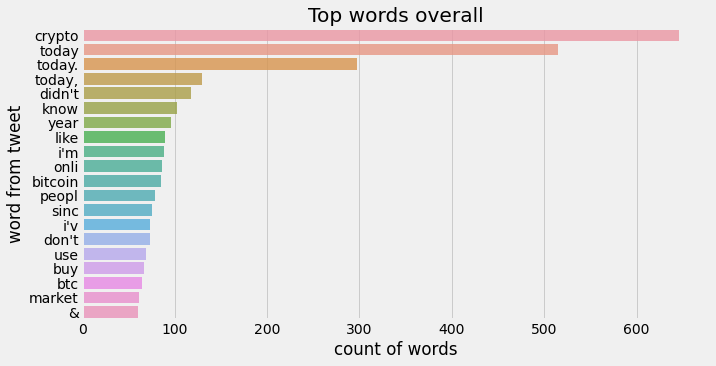

In [ ]:
#plot top 20 used words
df=df[:20]
plt.figure(figsize=(10,5))
sns.barplot(df.values,df.index,alpha=0.8)
plt.title("Top words overall")
plt.xlabel("count of words")
plt.ylabel("word from tweet")
plt.show()